In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


(1, 3, 3, 1)


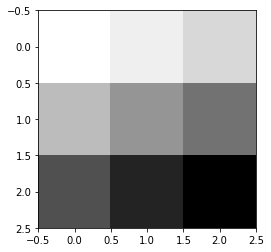

In [2]:
image = tf.constant([[[[1], [2], [3]],
                      [[4], [5], [6]],
                      [[7], [8], [9]]]], dtype=np.float32)
# image = tf.constant( [ [i+1] for i in range(9) ], dtype=np.float32 )
print(image.shape)

plt.imshow( image.numpy().reshape(3, 3), cmap='Greys' )
plt.show()

## 1. CONVOLUTION
## 1 filter (2,2,1,1) with padding: VALID

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)

↓ conv2d elements
[[12. 16.]
 [24. 28.]]


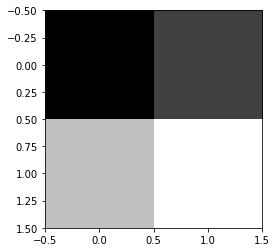

In [3]:
print("image.shape", image.shape)

weight = np.array([[[[1.]], [[1.]]],
                   [[[1.]], [[1.]]]])
print("weight.shape", weight.shape)

weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2,
                             padding='valid',
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print()

print("↓ conv2d elements")
print(conv2d.numpy().reshape(2,2))

plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

## 1 filter (2,2,1,1) with padding: SAME

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)

↓ conv2d elements
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


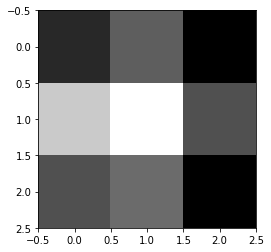

In [4]:
print("image.shape", image.shape)

weight = np.array([[[[1.]], [[1.]]],
                   [[[1.]], [[1.]]]])
print("weight.shape", weight.shape)

weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2,
                             padding='same',
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print()
print("↓ conv2d elements")
print(conv2d.numpy().reshape(3,3))

plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

## 3 filters (2,2,1,3)

image.shape (1, 3, 3, 1)
weight.shape (1, 4, 1, 3)
conv2d.shape (1, 3, 3, 3)

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]] 

[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]] 

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]] 



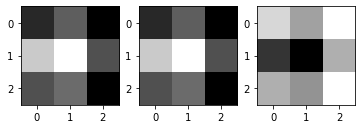

In [5]:
print("image.shape", image.shape)

weight = np.array([[[[1., 10., -1.]], [[1., 10., -1.]],
                    [[1., 10., -1.]], [[1., 10., -1.]]]])
print("weight.shape", weight.shape)

weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2,
                             padding='same',
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print()

feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3), '\n')
    plt.subplot(1, 3, i+1),
    plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

## 2. MAX POOLING

In [6]:
image = tf.constant([[[[4], [3]],
                      [[2], [1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=2, strides=1,
                              padding='valid')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


## SAME : Zero paddings

In [7]:
image = tf.constant([[[[4], [3]],
                      [[2], [1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=2, strides=1,
                              padding='same')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
